In [ ]:
pip install opencv-python

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
!unzip '/Dataset.zip'

Archive:  /Dataset.zip
replace masked/000 (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
mask_path = "/content/masked"
no_mask_path = "/content/unmasked"

In [ ]:
image_mask = []
target_mask = []
for i in os.listdir(mask_path):
    pic = os.path.join(mask_path + "/", i)
    image_mask.append(pic)
    target_mask.append("mask")   

image_no_mask = []
target_no_mask = []
for i in os.listdir(no_mask_path):
    pic = os.path.join(no_mask_path + "/", i)
    image_no_mask.append(pic)
    target_no_mask.append("without_mask")

mask = pd.DataFrame()
mask["image"] = image_mask
mask["target"] = target_mask

no_mask = pd.DataFrame()
no_mask["image"] = image_no_mask
no_mask["target"] = target_no_mask

df = pd.concat([mask, no_mask], axis = 0, ignore_index = True)
df = shuffle(df)
df

,image,target
1627,/content/unmasked/1_0_chenshu_0042.jpg,without_mask
2460,/content/unmasked/1_0_chenlong_0090.jpg,without_mask
981,/content/masked/010 (2).jpg,mask
1985,/content/unmasked/1_0_gaoyuanyuan_0211.jpg,without_mask
3586,/content/unmasked/1_0_chenweiting_0063.jpg,without_mask
...,...,...
3544,/content/unmasked/1_0_chenlong_0233.jpg,without_mask
3140,/content/unmasked/0_0_dongxuan_0015.jpg,without_mask
3503,/content/unmasked/1_0_chenbailin_0073.jpg,without_mask
2145,/content/unmasked/1_0_baojianfeng_0055.jpg,without_mask


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


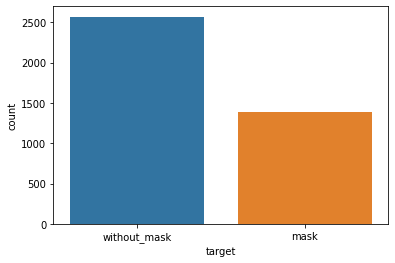

In [ ]:
sns.countplot(df['target'])
plt.show()

In [ ]:
def target_values(text):
    if (text == 'mask'):
        return 1
    else:
        return 0

In [ ]:
df['new_target'] = df['target'].apply(target_values)
label_data = list(df['new_target'])
# label_data

In [ ]:
df.head()

,image,target,new_target
1627,/content/unmasked/1_0_chenshu_0042.jpg,without_mask,0
2460,/content/unmasked/1_0_chenlong_0090.jpg,without_mask,0
981,/content/masked/010 (2).jpg,mask,1
1985,/content/unmasked/1_0_gaoyuanyuan_0211.jpg,without_mask,0
3586,/content/unmasked/1_0_chenweiting_0063.jpg,without_mask,0


In [ ]:
data = []
def gray_scale(path):
    img = cv.imread(path)
    GRAY_IMAGE = cv.cvtColor(img, cv2.COLOR_RGB2GRAY)
    GRAY_IMAGE = cv2.resize(GRAY_IMAGE, (64,64), interpolation=cv2.INTER_CUBIC)
    # GRAY_IMAGE = cv.imread(path, 0)
    return GRAY_IMAGE.flatten() 

In [ ]:
df['GRAY_IMAGE'] = df['image'].apply(gray_scale)
list_data = list(df['GRAY_IMAGE']) #df['image'].apply(gray_scale)
list_data

[array([ 19,  13,   8, ..., 105,  73,  55], dtype=uint8),
 array([ 77,  79,  75, ..., 127, 137, 138], dtype=uint8),
 array([ 96,  97,  75, ..., 123, 103, 114], dtype=uint8),
 array([85, 83, 76, ..., 15, 19, 24], dtype=uint8),
 array([ 16,  18,  25, ..., 143, 132, 128], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([241, 241, 242, ...,  49,  49,  51], dtype=uint8),
 array([ 90, 105, 119, ..., 157, 154, 150], dtype=uint8),
 array([ 73,  76,  75, ..., 135, 137, 138], dtype=uint8),
 array([197, 197, 205, ...,   6,  13,   9], dtype=uint8),
 array([60, 49, 43, ..., 76, 74, 71], dtype=uint8),
 array([ 70,  55,  54, ..., 120, 131, 132], dtype=uint8),
 array([13, 14, 16, ..., 17, 15, 13], dtype=uint8),
 array([205, 213, 221, ...,  55,  62,  63], dtype=uint8),
 array([78, 65, 72, ..., 25, 31, 33], dtype=uint8),
 array([172, 169, 177, ..., 116, 114, 112], dtype=uint8),
 array([  1,   1,   1, ..., 186, 178, 178], dtype=uint8),
 array([176, 170, 159, ..., 231, 226, 

In [ ]:
df.head()

,image,target,new_target,GRAY_IMAGE
1627,/content/unmasked/1_0_chenshu_0042.jpg,without_mask,0,"[19, 13, 8, 6, 9, 17, 19, 18, 22, 28, 37, 39, ..."
2460,/content/unmasked/1_0_chenlong_0090.jpg,without_mask,0,"[77, 79, 75, 70, 82, 91, 105, 119, 132, 143, 1..."
981,/content/masked/010 (2).jpg,mask,1,"[96, 97, 75, 70, 92, 122, 120, 113, 135, 107, ..."
1985,/content/unmasked/1_0_gaoyuanyuan_0211.jpg,without_mask,0,"[85, 83, 76, 79, 98, 110, 89, 29, 9, 5, 10, 9,..."
3586,/content/unmasked/1_0_chenweiting_0063.jpg,without_mask,0,"[16, 18, 25, 28, 37, 45, 70, 94, 109, 121, 136..."


In [ ]:
list_data[0]

array([ 19,  13,   8, ..., 105,  73,  55], dtype=uint8)

In [ ]:
print(len(df['GRAY_IMAGE'][0]))

4096


In [ ]:
column = []
for i in range(0,4096):
    column.append("column_" + str(i))

In [ ]:
df_new = pd.DataFrame(data = list_data, columns = column)
df_new['label'] = label_data
df_new.head()

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26,column_27,column_28,column_29,column_30,column_31,column_32,column_33,column_34,column_35,column_36,column_37,column_38,column_39,...,column_4057,column_4058,column_4059,column_4060,column_4061,column_4062,column_4063,column_4064,column_4065,column_4066,column_4067,column_4068,column_4069,column_4070,column_4071,column_4072,column_4073,column_4074,column_4075,column_4076,column_4077,column_4078,column_4079,column_4080,column_4081,column_4082,column_4083,column_4084,column_4085,column_4086,column_4087,column_4088,column_4089,column_4090,column_4091,column_4092,column_4093,column_4094,column_4095,label
0,19,13,8,6,9,17,19,18,22,28,37,39,33,24,14,14,11,14,20,27,29,24,20,14,9,10,10,12,12,13,9,8,8,12,15,16,21,22,19,16,...,135,151,165,171,176,184,192,194,199,200,201,207,211,213,213,211,208,205,199,191,182,169,158,151,142,131,120,116,115,114,117,126,138,149,156,138,105,73,55,0
1,77,79,75,70,82,91,105,119,132,143,155,152,143,144,122,108,101,100,104,93,70,47,34,27,15,19,21,25,22,28,38,58,82,70,63,78,88,82,81,85,...,80,77,75,73,69,64,62,62,62,61,59,55,54,53,51,52,51,51,47,52,56,49,55,58,57,56,59,64,64,71,78,83,95,102,108,121,127,137,138,0
2,96,97,75,70,92,122,120,113,135,107,98,89,93,94,83,156,199,180,168,169,132,149,154,169,176,167,209,237,252,252,252,246,192,175,172,160,113,138,145,160,...,122,106,86,80,124,136,146,164,180,188,192,199,203,181,158,135,125,127,118,115,139,125,116,140,132,138,137,120,125,118,126,121,125,118,121,108,123,103,114,1
3,85,83,76,79,98,110,89,29,9,5,10,9,8,12,15,16,18,19,22,24,31,35,37,39,50,54,56,55,54,53,54,54,52,48,47,41,39,40,40,38,...,128,133,133,133,134,132,130,126,125,123,117,117,117,113,113,123,135,150,152,125,70,15,9,10,9,11,5,6,9,10,9,9,11,12,18,21,15,19,24,0
4,16,18,25,28,37,45,70,94,109,121,136,147,154,157,165,172,185,189,188,189,190,196,199,195,193,194,193,190,188,187,185,184,184,182,180,177,174,173,172,167,...,8,8,9,11,19,32,38,43,54,61,65,69,78,87,97,105,103,103,98,101,103,116,127,148,165,172,173,174,174,168,168,168,166,162,162,159,143,132,128,0


In [ ]:
X = df_new.iloc[:,:4096]
# X.head()
Y = df_new['label']

In [ ]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y = train_test_split(X,Y, test_size = 0.33, random_state = 19, shuffle = True)

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(train_x,train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred_svm_model = svm_model.predict(valid_x)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(valid_y, y_pred_svm_model))

0.9831675592960979


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
rfc_model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_rfc_model = rfc_model.predict(valid_x)
print(accuracy_score(valid_y, y_pred_rfc_model))

0.9678653404743688


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter = 200,solver = 'liblinear')
lr_model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lr_model = rfc_model.predict(valid_x)
print(accuracy_score(valid_y, y_pred_lr_model))

0.9678653404743688


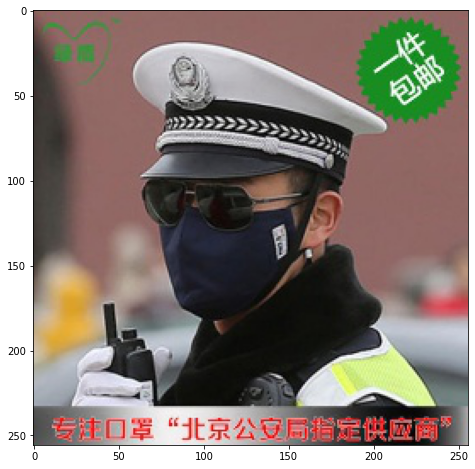

In [ ]:
plt.figure(figsize=(12,8))
img = load_img(df['image'][1000])
plt.imshow(img)
plt.show()

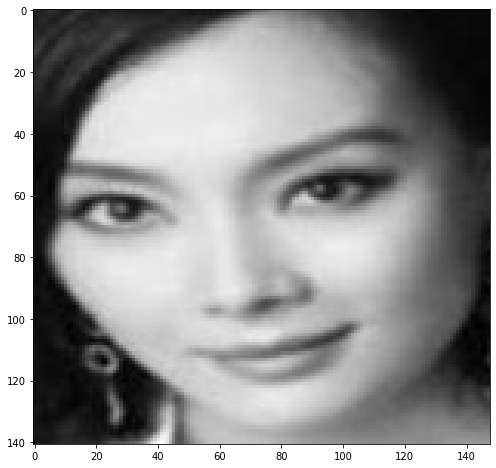

In [ ]:
plt.figure(figsize=(12,8))
img = load_img(no_mask['image'][1000])
plt.imshow(img)
plt.show()